In [1]:
pip install diffusers



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.2 MB/s eta 0:00:00






















In [2]:
from diffusers import StableDiffusionInpaintPipeline
from diffusers.utils import load_image, make_image_grid
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    revision="fp16",
    torch_dtype=torch.float16,
)
pipe = pipe.to(device)
init_image = load_image("1.jpg")
mask_image = load_image("new_mask.jpg")
#image and mask_image should be PIL images.
#The mask structure is white for inpainting and black for keeping as is
prompt = "painting of people sitting around table chatting and eating food"
image = pipe(prompt=prompt, image=init_image, mask_image=mask_image).images[0]
image.save("iter1.jpg")
make_image_grid([init_image, mask_image, image], rows=1, cols=3)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.

  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 

```

pip install accelerate

```

.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 

The secret `HF_TOKEN` does not exist in your Colab secrets.

To authenticate with the Hugging Face Hub, create a to

model_index.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:219: FutureWarning: You are loading the variant fp16 from runwayml/stable-diffusion-inpainting via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.

  warnings.warn(

text_encoder/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.75k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/635 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/821 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/810 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.

  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

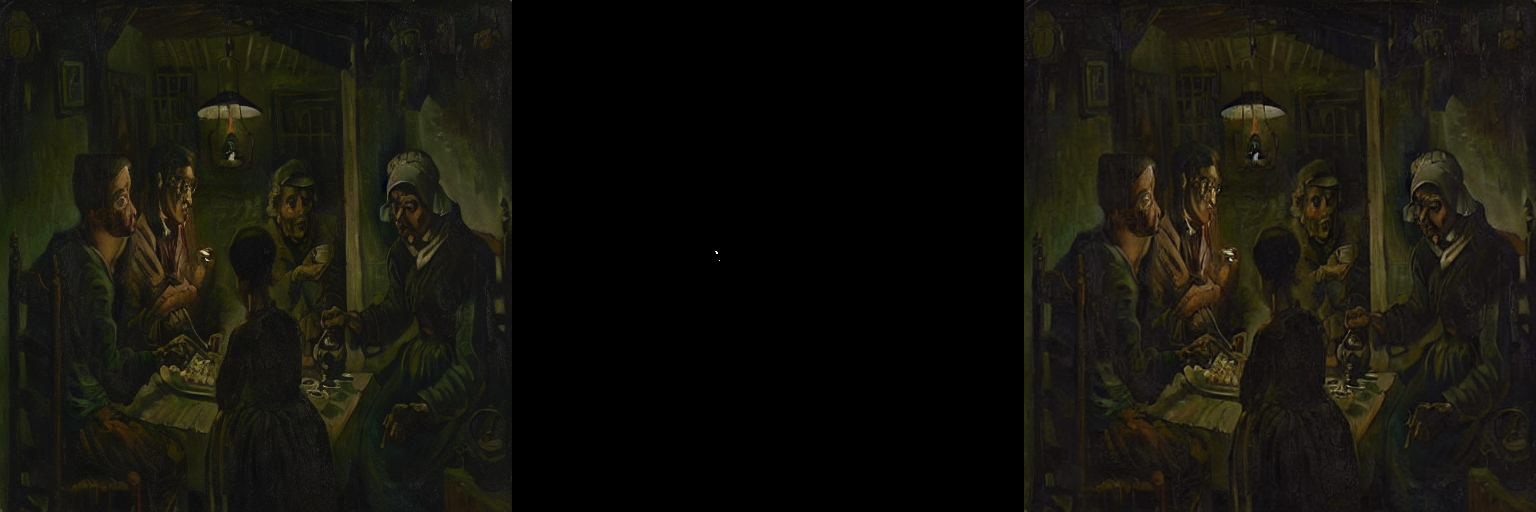

In [3]:
import cv2
import numpy as np

# Load the damaged painting image
painting = cv2.imread('iter1.jpg')

# Convert to grayscale (if necessary)
gray_painting = cv2.cvtColor(painting, cv2.COLOR_BGR2GRAY)

# Thresholding to identify damaged areas (you may need to adjust threshold value)
_, damaged_mask = cv2.threshold(gray_painting, 200, 255, cv2.THRESH_BINARY)

# Invert the mask so that damaged areas are white and background is black
damaged_mask = cv2.bitwise_not(damaged_mask)

# Save the mask image
cv2.imwrite('imask2.jpg', damaged_mask)
from PIL import Image

def invert_colors(image_path, save_path):
    # Open the image
    image = Image.open(image_path)

    # Convert image to grayscale if it's not already
    if image.mode != 'L':
        image = image.convert('L')

    # Invert colors
    inverted_image = Image.eval(image, lambda x: 255 - x)

    # Save the inverted image as jpg
    inverted_image.save(save_path, 'JPEG')

# Specify the path to your image
image_path = 'imask2.jpg'

# Specify the path to save the inverted image
save_path = 'new_mask2.jpg'

# Call the function to invert colors and save the image
invert_colors(image_path, save_path)
init_image2 = load_image("iter1.jpg")
mask_image2 = load_image("new_mask2.jpg")
image2 =pipe(prompt=prompt, image=init_image2, mask_image=mask_image2).images[0]
image.save("iter2.jpg")
make_image_grid([init_image2, mask_image2, image2], rows=1, cols=3)

In [4]:
import cv2
import numpy as np

# Load the damaged painting image
painting = cv2.imread('iter2.jpg')

# Convert to grayscale (if necessary)
gray_painting = cv2.cvtColor(painting, cv2.COLOR_BGR2GRAY)

# Thresholding to identify damaged areas (you may need to adjust threshold value)
_, damaged_mask = cv2.threshold(gray_painting, 200, 255, cv2.THRESH_BINARY)

# Invert the mask so that damaged areas are white and background is black
damaged_mask = cv2.bitwise_not(damaged_mask)

# Save the mask image
cv2.imwrite('imask3.jpg', damaged_mask)
from PIL import Image

def invert_colors(image_path, save_path):
    # Open the image
    image = Image.open(image_path)

    # Convert image to grayscale if it's not already
    if image.mode != 'L':
        image = image.convert('L')

    # Invert colors
    inverted_image = Image.eval(image, lambda x: 255 - x)

    # Save the inverted image as jpg
    inverted_image.save(save_path, 'JPEG')

# Specify the path to your image
image_path = 'imask3.jpg'

# Specify the path to save the inverted image
save_path = 'new_mask3.jpg'

# Call the function to invert colors and save the image
invert_colors(image_path, save_path)
init_image3 = load_image("iter2.jpg")
mask_image3 = load_image("new_mask3.jpg")
image3 =pipe(prompt=prompt, image=init_image3, mask_image=mask_image3).images[0]
image.save("iter3.jpg")
make_image_grid([init_image3, mask_image3, image3], rows=1, cols=3)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

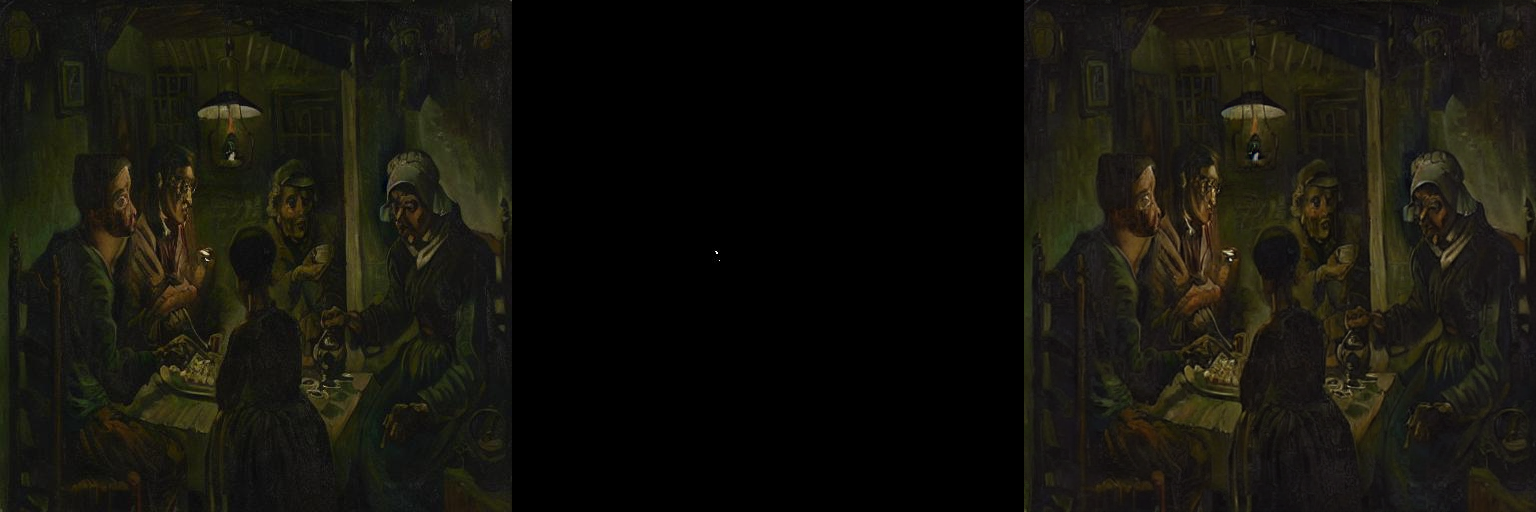

In [5]:
import cv2
import numpy as np

# Load the damaged painting image
painting = cv2.imread('iter3.jpg')

# Convert to grayscale (if necessary)
gray_painting = cv2.cvtColor(painting, cv2.COLOR_BGR2GRAY)

# Thresholding to identify damaged areas (you may need to adjust threshold value)
_, damaged_mask = cv2.threshold(gray_painting, 200, 255, cv2.THRESH_BINARY)

# Invert the mask so that damaged areas are white and background is black
damaged_mask = cv2.bitwise_not(damaged_mask)

# Save the mask image
cv2.imwrite('imask4.jpg', damaged_mask)
from PIL import Image

def invert_colors(image_path, save_path):
    # Open the image
    image = Image.open(image_path)

    # Convert image to grayscale if it's not already
    if image.mode != 'L':
        image = image.convert('L')

    # Invert colors
    inverted_image = Image.eval(image, lambda x: 255 - x)

    # Save the inverted image as jpg
    inverted_image.save(save_path, 'JPEG')

# Specify the path to your image
image_path = 'imask4.jpg'

# Specify the path to save the inverted image
save_path = 'new_mask4.jpg'

# Call the function to invert colors and save the image
invert_colors(image_path, save_path)
init_image4 = load_image("iter3.jpg")
mask_image4 = load_image("new_mask4.jpg")
image4 =pipe(prompt=prompt, image=init_image4, mask_image=mask_image4).images[0]
image.save("iter4.jpg")
make_image_grid([init_image4, mask_image4, image4], rows=1, cols=3)